# Density Plots

Notebook to make probability density plots of tmax events

Cascade Tuholske 2019-10-04

In [2]:
# Dependencies

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import glob

In [3]:
# File Paths

DATA_IN = '/home/cascade/projects/data_out_urbanheat/CHIRTS-GHS-Events-Stats/'

In [ ]:
# Open Files and Isolate India for Density

def event_stack_loop(dir_in, country):
    
    """ Loop through a dir with csvs of tmax events for each year and
    stack them into one data frame. Current file name is CHIRTS-GHS-Events-StatsXXXX.csv
    
    Args:
        dir_in = dir path to loop through
        country = country to subset

    """
        
    # Get File list
    fn_list = glob.glob(dir_in+'*.csv')
    
    # Data frame to fill
    df_out = pd.DataFrame()
    
    for fn in sorted(fn_list):
        
        print(fn)
    
        # Likely need to change year to int ... df['purchase'].astype(str).astype(int) <<<<---- FIX 
        year = fn.split('CHIRTS-GHS-Events-Stats')[2].split('.csv')[0] # for some reason it's 2...?
        print(year)
        
        # open csv 
        stats = pd.read_csv(fn)
        
        # isloate country 
        country = stats[stats['CTR_MN_NM']==country].copy()
        print(country.shape)
        
        # add year column 
        country['year'] = year
        
        df_out = df_out.append(country)
    
    return df_out


In [ ]:
# select india
# india_stack = event_stack_loop(DATA_IN, 'India')

In [ ]:
# Change data type

india_stack['year'] = india_stack['year'].astype(str).astype(int)

In [ ]:
india_stack[(india_stack['year'] == 1985)].head()

In [ ]:
# Subset 
# https://stackoverflow.com/questions/38884466/how-to-select-a-range-of-values-in-a-pandas-dataframe-column

india_stack[(india_stack['year'] >= 1986) & (india_stack['year'] >= 1995)]
india_stack[(india_stack['year'] >= 1986) & (india_stack['year'] >= 1995)]

In [ ]:
india86_95

In [ ]:
np.unique(india86_95['year'])

In [ ]:
# open csv 
stats1 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1985.csv')
stats2 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1986.csv')

df_out = pd.DataFrame()

country1 = stats1[stats1['CTR_MN_NM'] == 'India']
country1['year'] = 1985
country2 = stats2[stats2['CTR_MN_NM'] == 'India']
country2['year'] = 1986


df_out = df_out.append(country1)
print(len(df_out))
df_out = df_out.append(country2)
print(len(df_out))

In [ ]:
df_out.tail(1)

In [ ]:
# open csv 
stats1 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1985.csv')
stats2 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1986.csv')

df_out = pd.DataFrame()

country1 = stats1[stats1['CTR_MN_NM'] == 'India']
country1['year'] = 1985
country2 = stats2[stats2['CTR_MN_NM'] == 'India']
country2['year'] = 1986


df_out = df_out.append(country1)
print(len(df_out))
df_out = df_out.append(country2)
print(len(df_out))

In [4]:
# Open Files and Isolate India for Density

def event_stack_loop(dir_in):
    
    """ Loop through a dir with csvs of tmax events for each year and
    stack them into one data frame. Current file name is CHIRTS-GHS-Events-StatsXXXX.csv
    
    Args:
        dir_in = dir path to loop through

    """
        
    # Get File list
    fn_list = glob.glob(dir_in+'*.csv')
    
    # Data frame to fill
    df_out = pd.DataFrame()
    
    for fn in sorted(fn_list):
    
        # Likely need to change year to int ... df['purchase'].astype(str).astype(int) <<<<---- FIX 
        year = fn.split('CHIRTS-GHS-Events-Stats')[2].split('.csv')[0] # for some reason it's 2...?
        print(year)
        
        # open csv 
        stats = pd.read_csv(fn)
        
        stats['year'] = year
        
        print(len(df_out))
        
        df_out = df_out.append(stats)
    
    return df_out


In [5]:
event_stack = event_stack_loop(DATA_IN)

1983
0
1984
22697
1985
45973
1986
68052
1987
90782
1988
118152
1989
141253
1990
165683
1991
188246
1992
210758
1993
233690
1994
256043
1995
277151
1996
302703
1997
327548
1998
349972
1999
377141
2000
405013
2001
429536
2002
451902
2003
479397
2004
505665
2005
532560
2006
561806
2007
587661
2008
612509
2009
638375
2010
671454
2011
707812
2012
733383
2013
763002
2014
789451
2015
819600
2016
849829


In [6]:
event_stack.tail(1)

,Unnamed: 0,ID_HDC_G0,CTR_MN_NM,total_days,duration,avg_temp,avg_intensity,tot_intensity,events,intensity,tmax,year
33196,33196,1040,Argentina,1,1,40.724358,0.124358,0.124358,['2016.12.29'],[0.124358],[40.724358],2016


In [7]:
event_stack.dtypes

Unnamed: 0         int64
ID_HDC_G0          int64
CTR_MN_NM         object
total_days         int64
duration           int64
avg_temp         float64
avg_intensity    float64
tot_intensity    float64
events            object
intensity         object
tmax              object
year              object
dtype: object

In [49]:
india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india86_95 = india[(india['year'] >= 1986) & (india['year'] <= 1995)]

In [9]:
india86_95.tail()

,Unnamed: 0,ID_HDC_G0,CTR_MN_NM,total_days,duration,avg_temp,avg_intensity,tot_intensity,events,intensity,tmax,year
24889,24889,8320,India,1,1,41.705690,1.105690,1.105690,['1995.04.01'],[1.10569],[41.70569],1995
24973,24973,8398,India,1,1,40.684480,0.084480,0.084480,['1995.04.01'],[0.08448],[40.68448],1995
24974,24974,8291,India,1,1,41.093563,0.493563,0.493563,['1995.04.01'],[0.493563],[41.093563],1995
24975,24975,8307,India,1,1,41.286520,0.686520,0.686520,['1995.04.01'],[0.68652],[41.28652],1995
25010,25010,8292,India,1,1,41.177170,0.577170,0.577170,['1995.04.01'],[0.57717],[41.17717],1995


In [50]:
india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india96_05 = india[(india['year'] >= 1996) & (india['year'] <= 2005)]

In [51]:
india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india06_15 = india[(india['year'] >= 2006) & (india['year'] <= 2015)]

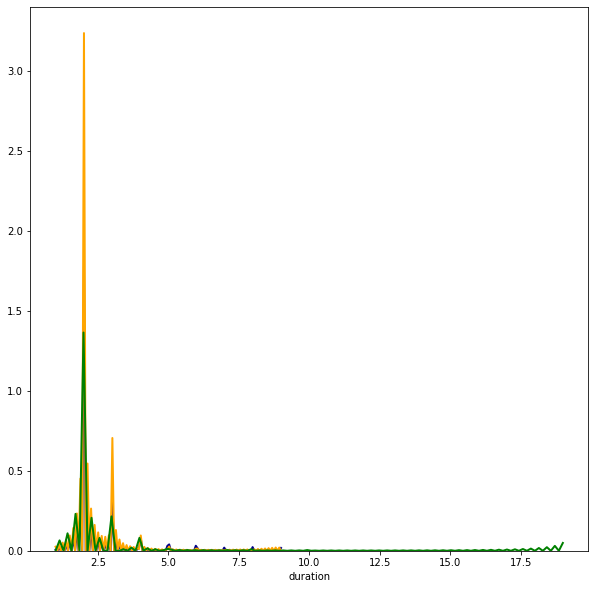

In [37]:
import seaborn as sns

fig = plt.subplots(figsize=[10,10])

sns.distplot(india86_95['duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

sns.distplot(india96_05['duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

sns.distplot(india06_15['duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# Look for events L = 0 ... 

In [91]:
def p_X_gt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

In [92]:
india86_95['duration'].sort_values()

1054      1
12663     1
12667     1
12669     1
12673     1
         ..
13169    59
12855    59
13637    59
13199    59
12867    59
Name: duration, Length: 121271, dtype: int64

In [93]:
data = india06_15['duration'].sort_values()
X, y = p_X_gt_x(data)

data.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 62, 63])

Text(0, 0.5, 'P[X>=x]')

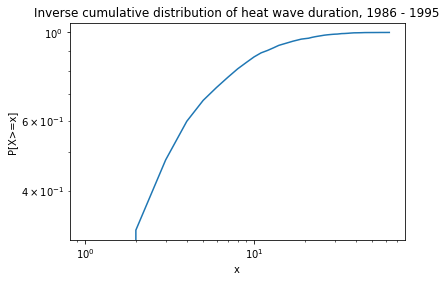

In [94]:
plt.plot(X,1 - y)
plt.xscale('log')
plt.yscale('log')

plt.title('Inverse cumulative distribution of heat wave duration, 1986 - 1995')
plt.xlabel('x')
plt.ylabel('P[X>=x]')

In [95]:
import scipy.stats as st

In [106]:
dist = st.pareto
params = dist.fit(data) # , 1)

In [107]:
print(params)

(1.2218251188152642, -0.6884965764682882, 1.688496576371829)


In [108]:
y, x = np.histogram(data, bins = 30, density = True)
x = (x+np.roll(x, -1))[:-1] / 2.0

# exp
#pdf = dist.pdf(x, loc = params[-2], scale = params[-1])

# pareto 
pdf = dist.pdf(x, 1, loc = params[-2], scale = params[-1])

In [109]:
ss_error = np.sum(np.power(y - pdf, 2.0))
ss_yy = np.sum(np.power(y - y.mean(), 2.0))

In [110]:
r_2 = 1 - (ss_error / ss_yy)
print(r_2)

# https://stackoverflow.com/questions/42260519/defining-pareto-distribution-in-python-scipy

0.9517322870030014
